# LDA-SVM

In [6]:
#import libraries

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd



In [7]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")


In [8]:
#standardization
import standardization as sd
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)
tst = standardizer.transform(test_data)



# LDA    

Preserving 99.69% of variance


,0,1,2,3,4,target
0,0.004757,-0.045755,0.089389,0.017137,0.006588,0.0
1,-0.000469,0.008813,0.072518,-0.031919,-0.032985,0.0
2,0.001390,-0.046905,0.138526,0.028653,-0.008737,0.0
3,0.003533,-0.033657,0.148509,0.122270,0.028721,0.0
4,0.004092,-0.044128,0.079762,-0.016918,-0.008818,0.0
...,...,...,...,...,...,...
25321,0.476521,-0.317141,-0.120874,-0.013577,-0.381435,20.0
25322,0.476663,-0.383989,-0.024706,0.117220,-0.341047,20.0
25323,0.476955,-0.250092,-0.082129,0.099386,-0.358384,20.0
25324,0.480123,-0.281227,-0.089738,0.176697,-0.321982,20.0


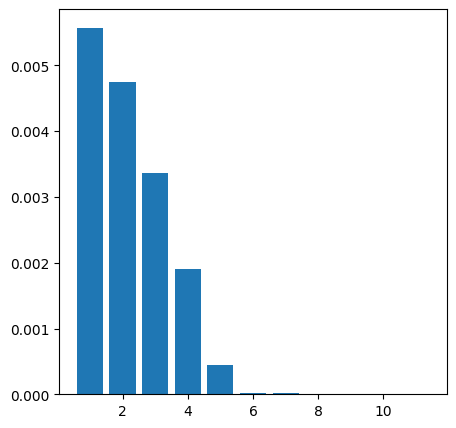

In [9]:
#Doing LDA transformation from 11 dimension to 5, by using a self implemented libary 
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')
LDA = lda.transform(trn)
LDA_tst = lda.transform(tst)
LDA

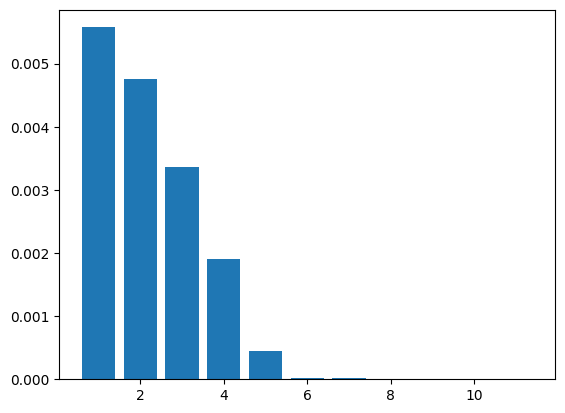

In [10]:
#Saves the eigenvalue plot
plt.bar([x for x in range(1,11+1)],np.real(lda.eig_val[0:11]))
plt.savefig("LDA-SVM_eigvalue.pdf", format="pdf", bbox_inches="tight")


# SVM

In [11]:
#Getting the labels for the training data:
targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']


#Training the SVM, on the 5 dimensional data, using sklearn
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)#kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf_svm.fit(LDA.drop('target',axis=1), labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

# Confusion matrix for training data

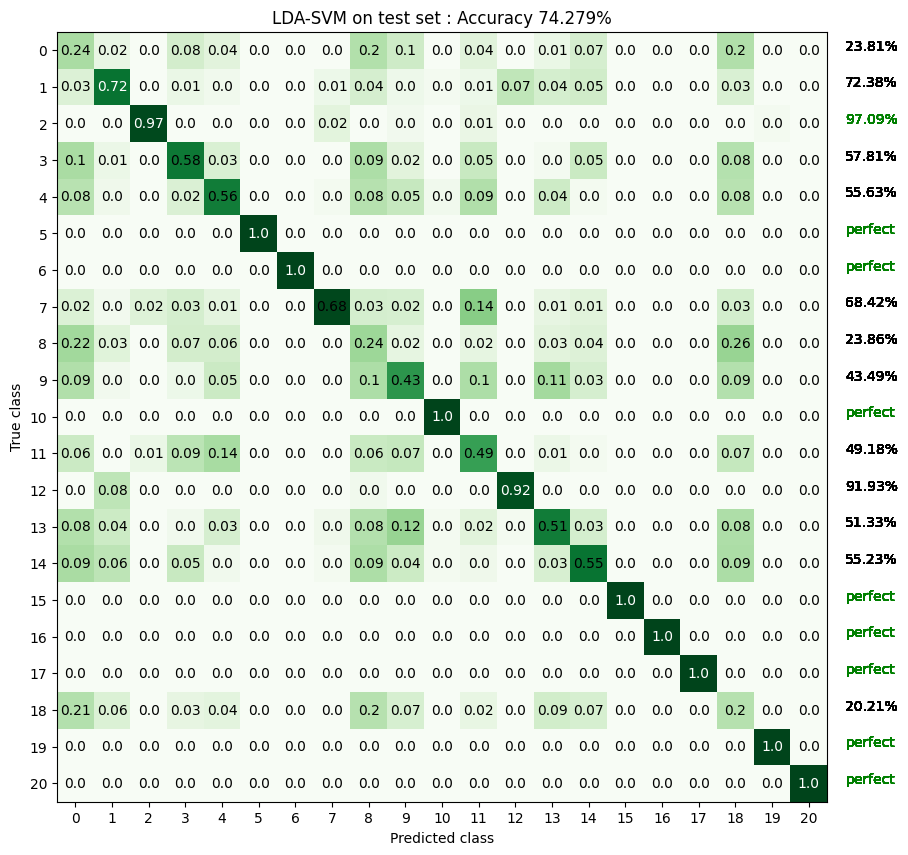

In [12]:

#With the tranied SVM classfier, it is test how well it works for the data it was trained on. 
predict = clf_svm.predict(LDA.drop('target',axis=1))

#Plotting confusion matrix
targets = train_data['target'].unique().tolist()
numbers = targets
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on test set',save_fig_name='LDA-SVM confusion matrix.pdf')
pass

# Confusion matrix for test data

In [13]:
#Prediction the classes for the testning data, for the SVM classifer trained on the training data.
predict_tst = clf_svm.predict(LDA_tst.drop('target',axis=1))
#Getting labels for testing data:
labels_tst = test_data['target']

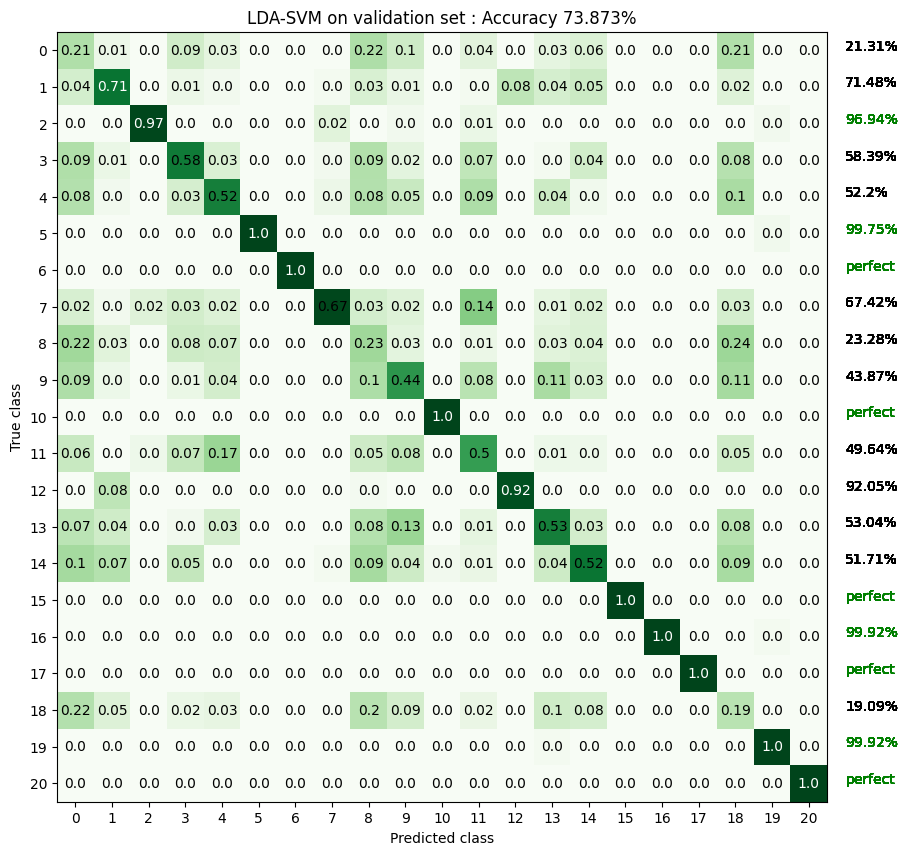

In [14]:
numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on validation set',save_fig_name='LDA-SVM confusion matrix Validation.pdf')
pass